<a href="https://colab.research.google.com/github/royder789/StockPrediction/blob/main/stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
ticker = 'AAPL'
start_date = '2020-01-01'
end_date = '2023-01-01'
dfs = yf.download('AAPL', start=start_date, end=end_date)
dfs


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.796021,72.856613,71.545387,71.799873,135480400
2020-01-03,72.088295,72.851761,71.862892,72.020432,146322800
2020-01-06,72.662712,72.701492,70.954002,71.206070,118387200
2020-01-07,72.320976,72.929322,72.100418,72.672409,108872000
2020-01-08,73.484344,73.787308,72.022850,72.022850,132079200
...,...,...,...,...,...
2022-12-23,130.487793,131.041963,128.290894,129.557573,63814900
2022-12-27,128.676849,130.042493,127.380484,130.012807,69007800


In [ ]:
dfs.to_csv('AAPL.csv')

In [ ]:
import pandas as pd
dfs=pd.read_csv('AAPL.csv')

In [ ]:
dfs.head()

,Price,Close,High,Low,Open,Volume
0,Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
1,Date,NaN,NaN,NaN,NaN,NaN
2,2020-01-02,72.7960205078125,72.85661316556887,71.54538716413333,71.79987336808419,135480400
3,2020-01-03,72.08829498291016,72.85176099103282,71.86289207131898,72.0204315021118,146322800
4,2020-01-06,72.66271209716797,72.70149228565275,70.95400211001883,71.20606963688756,118387200


In [ ]:
df1=dfs.reset_index()['Close']
df1=df1[2:,]
df1

,Close
2,72.7960205078125
3,72.08829498291016
4,72.66271209716797
5,72.32097625732422
6,73.48434448242188
...,...
753,130.48779296875
754,128.67684936523438
755,124.72836303710938
756,128.2611846923828


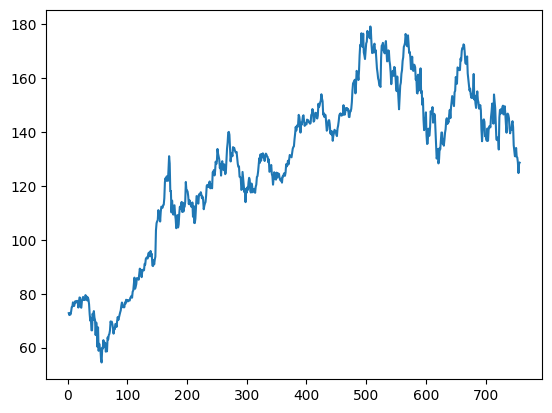

In [ ]:
import matplotlib.pyplot as plt
# Convert the 'Close' column to numeric, handling potential errors
df1 = pd.to_numeric(dfs['Close'], errors='coerce')
plt.plot(df1)
plt.show() # Add this line to display the plot


In [ ]:

 import numpy as np

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))#-1 se hamko number of rows mil jati hai

In [ ]:
training_size=int(len(df1)*0.70)
test_size=int(len(df1)-0.65)
train_data,test_data=df1[0:training_size,:],df1[int(training_size):int(len(df1)),:1]

In [ ]:
training_size,test_size

(530, 757)

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
time_step=150
x_train,y_train=create_dataset(train_data,time_step)
x_test,y_test=create_dataset(test_data,time_step)

In [ ]:
print(x_test)

[[0.92575163 0.91997857 0.9450486  ... 0.79934315 0.78744645 0.81052582]
 [0.91997857 0.9450486  0.95651582 ... 0.78744645 0.81052582 0.85858848]
 [0.9450486  0.95651582 0.92361618 ... 0.81052582 0.85858848 0.78252902]
 ...
 [0.69585356 0.67407337 0.67534071 ... 0.63845765 0.61287731 0.60993781]
 [0.67407337 0.67534071 0.70116015 ... 0.61287731 0.60993781 0.59539988]
 [0.67534071 0.70116015 0.74757195 ... 0.60993781 0.59539988 0.56370215]]


In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)#x_train.shape=time_step
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)


In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
x_train.shape

(379, 150, 1)

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(150,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=250,batch_size=64,verbose=1)

Epoch 1/250
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: nan - val_loss: nan
Epoch 2/250
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: nan - val_loss: nan
Epoch 3/250
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: nan - val_loss: nan
Epoch 4/250
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: nan - val_loss: nan
Epoch 5/250
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: nan - val_loss: nan
Epoch 6/250
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: nan - val_loss: nan
Epoch 7/250
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: nan - val_loss: nan
Epoch 8/250
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: nan - val_loss: nan
Epoch 9/250
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: nan - val_loss: nan
Epoch 10/250
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: nan - val_loss: nan
Epoch 11/250
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: nan - val_loss: nan
Epoch 12/250
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: nan - val_loss: nan
Epoch 13/250
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: na

In [ ]:
import tensorflow as tf
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

ValueError: Input contains NaN.

In [ ]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

ValueError: could not broadcast input array from shape (77,1) into shape (177,1)